KNN Model Accuracy on validation set: 0.8297


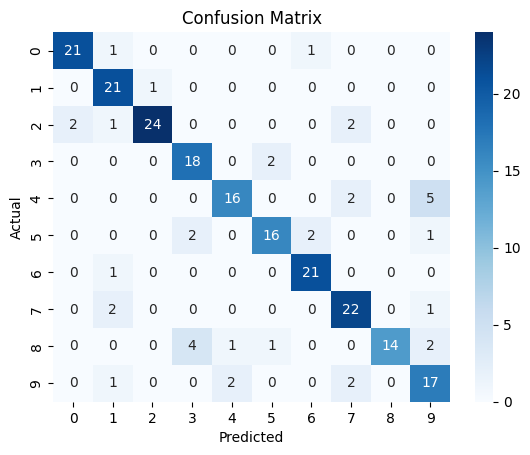


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        23
           1       0.78      0.95      0.86        22
           2       0.96      0.83      0.89        29
           3       0.75      0.90      0.82        20
           4       0.84      0.70      0.76        23
           5       0.84      0.76      0.80        21
           6       0.88      0.95      0.91        22
           7       0.79      0.88      0.83        25
           8       1.00      0.64      0.78        22
           9       0.65      0.77      0.71        22

    accuracy                           0.83       229
   macro avg       0.84      0.83      0.83       229
weighted avg       0.84      0.83      0.83       229

Average Cross-Validation Accuracy: 0.8625
Sample Predictions on Test Data: [2 0 9 7 2 7 0 3 0 3]
Submission file 'submission.csv' has been saved.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Load dataset
df = pd.read_csv("train.csv")  # Update path if needed

# Preprocess data
X = df.iloc[:, 1:].values  # Pixel intensity features
y = df.iloc[:, 0].values    # Digit labels

# Handle missing values (fill NaNs with 0)
X = np.nan_to_num(X)

# Normalize pixel values (0-255) to (0-1) for better performance
X = X / 255.0

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train KNN model
k = 3  # Choose K (can tune this hyperparameter)
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Model Accuracy on validation set: {accuracy:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# K-Fold Cross Validation
cv_scores = cross_val_score(knn, X, y, cv=5)
print(f"Average Cross-Validation Accuracy: {np.mean(cv_scores):.4f}")

# Load test dataset (no labels)
test_data = pd.read_csv("test.csv")

# Handle missing values in test set
test_data = np.nan_to_num(test_data)

# Normalize pixel values
test_data = test_data / 255.0

# Predict using trained model
test_predictions = knn.predict(test_data)

# Print first few predictions
print("Sample Predictions on Test Data:", test_predictions[:10])

# Prepare submission
submission = pd.DataFrame({"ImageId": range(1, len(test_predictions) + 1), "Label": test_predictions})
submission.to_csv("submission.csv", index=False)
print("Submission file 'submission.csv' has been saved.")